### RIMES dataset usage

In [1]:
import sys
import os
sys.path.append(os.path.abspath('data_collection/..'))
from data_collection.datasets import RIMESDataset
import matplotlib.pyplot as plt
from torchvision import transforms

## Load dataset and transform

In [ ]:
lines_dir = '/data/RIMES-2011-Lines/Train/train_labels.csv' # change
ascii_file = '/data/RIMES-2011-Lines/Train/Images' # change

transform = transforms.Compose([
    transforms.RandomRotation(degrees=5),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02), scale=(0.95, 1.05), shear=5),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = RIMESDataset(lines_txt_path=lines_dir,
                     base_image_path=ascii_file,
                     transform=transform)

print(len(dataset))

Image not found: /Users/pavithrasridhar/Desktop/colpali_qw-handwritten-ft/data/RIMES-2011-Lines/Train/Images/Filenames
10188


##  Access data samples

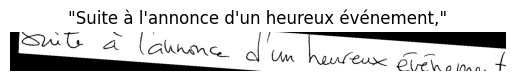

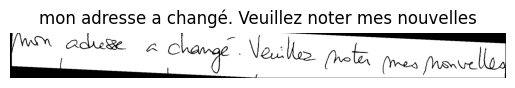

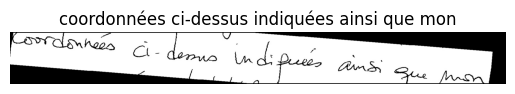

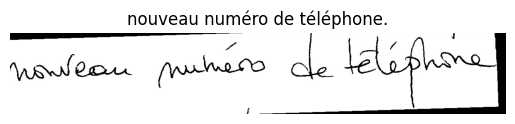

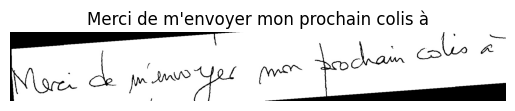

In [4]:
i=0
for img, text in dataset:
    i+=1
    if i>5:
        break
    img = img.squeeze(0).numpy()
    plt.imshow(img, cmap='gray')
    plt.title(text)
    plt.axis('off')
    plt.show()

## dataset stats

In [ ]:
from collections import Counter
import torch

# Basic stats
print(f"Number of samples: {len(dataset)}")
print("_____"*5)

heights = []
widths = []
text_lengths = []

for i in range(min(100, len(dataset))):  # sample first 100 images (for speed)
    img, text = dataset[i]
    if isinstance(img, torch.Tensor):
        _, h, w = img.shape  # Tensor shape: (C, H, W)
    else:
        w, h = img.size  # PIL image: (W, H)

    heights.append(h)
    widths.append(w)
    text_lengths.append(len(text))

# Image size stats
print(f"Average image height: {sum(heights) / len(heights):.2f}")
print(f"Average image width: {sum(widths) / len(widths):.2f}")
print(f"Min image size: {min(widths)}x{min(heights)}")
print(f"Max image size: {max(widths)}x{max(heights)}")

print("_____"*5)
# Text length stats
print(f"Average text length: {sum(text_lengths) / len(text_lengths):.2f} characters")
print(f"Max text length: {max(text_lengths)} characters")
print(f"Min text length: {min(text_lengths)} characters")

# (Optional) Check some most common text lengths
text_length_counts = Counter(text_lengths)
print(f"Most common text lengths: {text_length_counts.most_common(5)}")


Number of samples: 10188
_________________________
Average image height: 131.22
Average image width: 1508.51
Min image size: 184x59
Max image size: 2283x260
_________________________
Average text length: 41.07 characters
Max text length: 68 characters
Min text length: 6 characters
Most common text lengths: [(44, 6), (45, 5), (46, 5), (50, 4), (55, 4)]
